100%|██████████| 100000/100000 [00:04<00:00, 22212.81it/s]


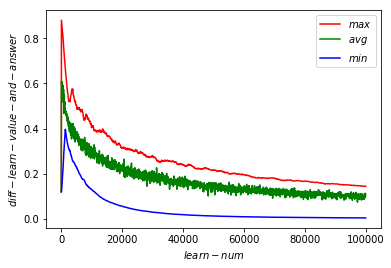

In [1]:
# 前回のもの(Neuron)

% matplotlib inline

from matplotlib import pyplot as plt
from tqdm import tqdm
import numpy as np

class Neuron():
    def __init__(self, input_num):
        self._rate = 0.01
        self._weight = np.array(np.round(np.random.rand(input_num)))
        self._bias = 1.0
        self._y = None

    def learn(self, x):
        t = self._get_correct(x)
        s = self._weight.dot(x) + self._bias  
        self._y = 1 / (1 + np.exp(-s))  # ※出力値(予測値)　※を交換可能にするmethod(シグモイド関数)
        diff_y = self._y - t  # 誤差関数の微分 ∂E/∂y0 
        
        diff_state = self._y * (1 - self._y)  # ※交換可能にする method切り出すシグモイド関数の微分　∂y0/∂s0 
        
        diff_common = diff_y * diff_state  # ∂E/∂y0 * ∂y0/∂s0 　
        self._weight -= self._rate * diff_common * x  
        self._bias -= self._rate * diff_common 

        return np.abs(self._y - t)

    def _get_correct(self, x):
        return 0 if (x[x == 0.0].size) else 1

if __name__ == '__main__':
    input_num = 2
    learn_num = 100000
    interval = 50

    n = Neuron(input_num)
    output_x = []
    tmp_y = []
    output_y_max = []
    output_y_avg = []
    output_y_min = []
    for i in tqdm(range(0, learn_num)):
        x = np.array(np.round(np.random.rand(input_num)))
        diff = n.learn(x)
        tmp_y.append(diff)
        if i % interval == 0:
            output_y_max.append(max(tmp_y))
            output_y_avg.append(sum(tmp_y) / len(tmp_y))
            output_y_min.append(min(tmp_y))
            tmp_y = []
            output_x.append(i+1)

    # output
    line_max, line_avg, line_min = plt.plot(
        output_x, output_y_max, 'r-', 
        output_x, output_y_avg, 'g-', 
        output_x, output_y_min, 'b-'
    )
    plt.legend((line_max, line_avg, line_min), ('$max$', '$avg$', '$min$'))
    plt.xlabel('$learn-num$')
    plt.ylabel('$diff-learn-value-and-answer$')
    plt.show()

In [158]:
class Layer:
    
    def __init__(self):
        self._rate = 0.01
        self._weight = np.array([[1.,1.],
                                [1.,1.]])
        self._bias = np.array([[1.],
                              [1.]])
        self._c = np.array([[1.],
                            [1.]])
        self._y = None
        self._delta = None
        self._x = None
        
    def set_state(self, x):
        s = (self._weight.dot(x))+1*self._bias
        return s

    def activate(self, s):
        self._y = 1 / (1 + np.exp(-s))
        return self._y
    
    def foward(self, x):
        return self.activate(self.set_state(x))
    
    def delta(self, t, y):
        de = self._y - t
        dy = self._y * (1 - self._y) 
        self._delta = de * dy
        return self._delta
    
    def back_propagation(self, delta):

        self._weight -= self._rate * np.eye(2, 2).dot(self._delta).dot(self._y).dot(np.array([1, 1]))
        
#         print("self._bias", self._bias)
#         print("self._delta", self._delta)
#         print("self._c", self._c)
        self._bias -=  self._delta * self._c
#         print("self._weight, self._bias",self._weight, self._bias)
        return self.foward(self._y)

if __name__ == '__main__':
    n1 = Layer() # 設定
#     t = np.array([[1.],
#                   [2.]])
#     x1 = np.array([[2.],
#                    [3.]])
   
    
#     n1._y = n1.foward(x1)
#     delta = n1.delta(t, n1._y)
#     back_parameters = n1.back_propagation(delta)
#     print("1層目：", back_parameters)
    
    input_value = np.array([[[0],
                             [0]],
                            [[0],
                             [1]],
                            [[1],
                             [0]],
                            [1,1],
                            [1,0],
                            [0,0],
                            [0,1]])
    output_value = np.array([[0,0],
                             [1,0],
                             [1,0],
                             [1,1],
                             [1,0],
                             [0,0],
                             [1,0]])
    
    for i,o in zip(input_value,output_value):
        n1._y = n1.foward(x1)
        delta = n1.delta(t, n1._y)
#         back_parameters = n1.back_propagation(delta)
        print(n1.back_propagation(delta))
        
        #print("1層目：", back_parameters)
    
    


ValueError: shapes (2,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

In [ ]:
self._weight -= self._rate * np.eye(2, 2).dot(self._delta).dot(self._y).dot(np.array([1, 1]))

In [157]:
np.array([1, 1])

array([1, 1])

In [104]:
x = np.array([[-0.01798621, -1.01798621]])

In [137]:
0.01*x

array([[-0.00017986, -0.01017986]])

In [7]:
# 前回のLayer

class Layer:
    
    def __init__(self, m, n):
        self.W = np.random.rand(m, n) - 0.5  # m行n列を設定  numpyのbroadcastで全ての行列に合わせて -0.5をしてくれるので 0 ~ 1の数を -0.5 ~ 0.5の範囲になる
#         self.b = np.random.rand(m, 1)  # [] m行1列の要素をバイアスに与える
        self.b = np.zeros((m, 1))  # m行1列の　0ベクトルを作成してくれている  http://www.kamishima.net/mlmpyja/nbayes1/ndarray.html
    def set_state(self, x):
        s = (self.W.dot(x))+1*self.b
        return s

    def activate(self, s):
        y = 1 / (1 + np.exp(-s))
        return y

    def output(self, x):
        return self.activate(self.set_state(x))

if __name__ == '__main__':
    n1 = Layer(2, 2) # 設定
    x1 = np.array([[1.],
                  [2.]])
    print("1層目：", n1.output(x1))
    
    n2 = Layer(2, 2)
    x2 = n1.output(x1)
    print("2層目：", n2.output(x2))
    
    n3 = Layer(2, 2)
    x3 = n1.output(x2)
    print("2層目：", n3.output(x3))
     

1層目： [[ 0.68654066]
 [ 0.58420796]]
2層目： [[ 0.51388293]
 [ 0.58443086]]
2層目： [[ 0.58126855]
 [ 0.47488235]]


In [96]:
x = np.array([[2],
              [1]])
y = np.array([[3,4],
              [1,1]])

In [97]:
y.dot(x)

array([[10],
       [ 3]])

AttributeError: 'Layer' object has no attribute '_bias'